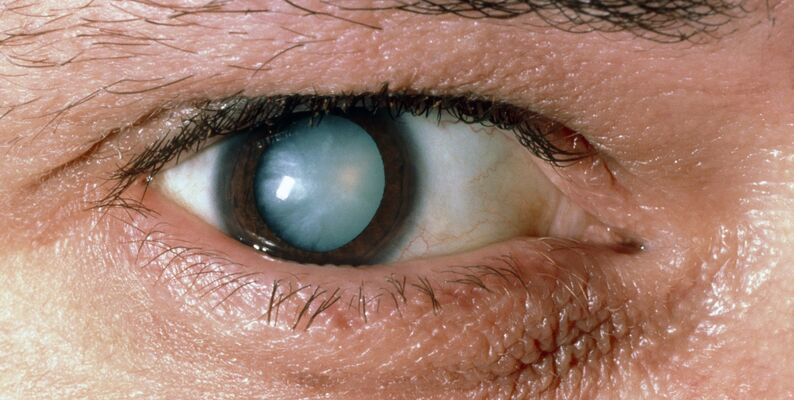

## Import Data Set

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [79]:
pwd

'/kaggle/working'

In [4]:
my_data_dir='/kaggle/input/cataract-image-dataset/processed_images/'

In [8]:
os.listdir(my_data_dir)

['test', 'train']

In [9]:
train_path = my_data_dir+'train'
test_path = my_data_dir+'test'

In [10]:
os.listdir(train_path)

['normal', 'cataract']

In [11]:
os.listdir(test_path)

['normal', 'cataract']

## Train_path

In [70]:
plant_types = ["normal", "cataract"]

# Her bir bitki türü için boş liste oluştur
cataract = []
normal = []

# Her bir bitki türü için dosya sayısını hesaplayın
total_images = 0
for plant_type in plant_types:
    # Bitki türü klasöründeki dosya sayısını alın
    file_list = os.listdir(os.path.join(train_path, plant_type))
    
    # Her bir dosyayı ilgili listeye ekleyin
    if plant_type == "cataract":
        cataract.extend(file_list)
    elif plant_type == "normal":
        normal.extend(file_list)
    
    # Dosya sayısını yazdırın
    print(f"Number of {plant_type} images:", len(file_list))
    
    # Toplam dosya sayısını güncelleyin
    total_images += len(file_list)

# Toplam dosya sayısını yazdırın
print("Total images:", total_images)


Number of normal images: 246
Number of cataract images: 245
Total images: 491


## Test_path

In [72]:
plant_types = ["normal", "cataract"]

# Her bir bitki türü için boş liste oluştur
cataract = []
normal = []

# Her bir bitki türü için dosya sayısını hesaplayın
total_images = 0
for plant_type in plant_types:
    # Bitki türü klasöründeki dosya sayısını alın
    file_list = os.listdir(os.path.join(test_path, plant_type))
    
    # Her bir dosyayı ilgili listeye ekleyin
    if plant_type == "cataract":
        cataract.extend(file_list)
    elif plant_type == "normal":
        normal.extend(file_list)
    
    # Dosya sayısını yazdırın
    print(f"Number of {plant_type} images:", len(file_list))
    
    # Toplam dosya sayısını güncelleyin
    total_images += len(file_list)

# Toplam dosya sayısını yazdırın
print("Total images:", total_images)


Number of normal images: 60
Number of cataract images: 61
Total images: 121


In [14]:
print(f"Train: {len(os.listdir(train_path+'/normal'))}")
print(f"Test: {len(os.listdir(test_path+'/normal'))}")

Train: 246
Test: 60


In [15]:
os.listdir(train_path+'/normal')[0]

'image_1.png'

In [19]:
path1=train_path+'/normal'+'/image_138.png'
path2=train_path+'/cataract'+'/image_138.png'

In [28]:
normal_img=imread(path1)
cataract_img=imread(path2)

In [ ]:
plt.imshow(normal_img)

In [ ]:
plt.imshow(cataract_img)

In [29]:
normal_img.max()

1.0

In [30]:
normal_img.min()

0.0

In [32]:
normal_img.shape

(171, 242, 3)

In [33]:
cataract_img.shape

(335, 493, 3)

## Normal shape mean

In [38]:
x= []
y = []
for image in os.listdir(train_path+'/normal'):
    
    img = imread(train_path+'/normal/'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)

<Axes: >

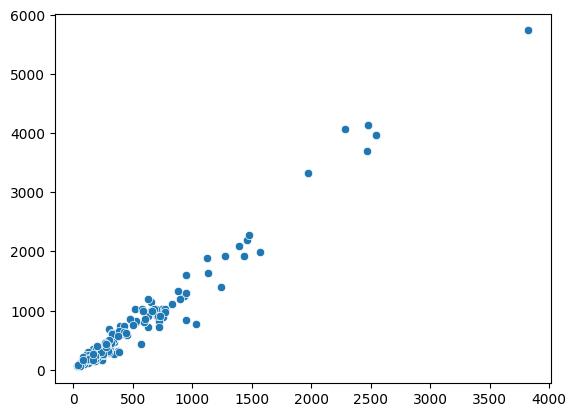

In [35]:
sns.scatterplot(x=x,y=y)

In [39]:
np.mean(x)

406.5081300813008

In [40]:
np.mean(y)

594.1422764227642

## Cataract mean shape

In [41]:
x= []
y = []
for image in os.listdir(train_path+'/cataract'):
    
    img = imread(train_path+'/cataract/'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)

<Axes: >

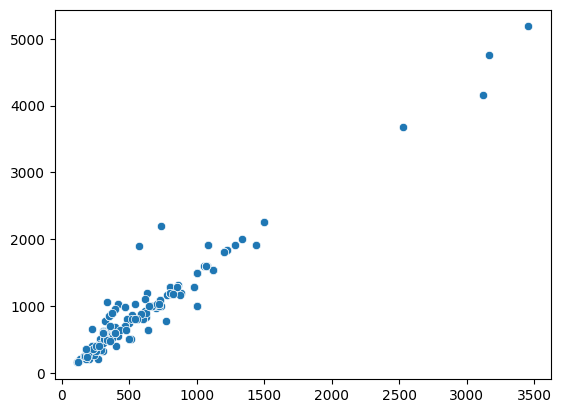

In [37]:
sns.scatterplot(x=x,y=y)

In [42]:
np.mean(x)

606.1183673469387

In [43]:
np.mean(y)

925.3591836734694

In [52]:
image_shape = (500,800,3)

# ImageDataGenerator

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [45]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               #rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [ ]:
plt.imshow(image_gen.random_transform(normal_img))

# Creating the Model

## Early Stopping

In [75]:
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [77]:
batch_size = 32

train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(500, 800),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(500, 800),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 491 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [91]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 498, 798, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 249, 399, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 249, 399, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 249, 399, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 247, 397, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 123, 198, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 123, 198, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 123, 198, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 121, 196, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 60, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 60, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 60, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 188160)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │     6,021,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,035,969 (23.03 MB)

 Trainable params: 6,035,745 (23.02 MB)

 Non-trainable params: 224 (896.00 B)

In [92]:
results = model.fit(train_image_gen,epochs=30,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - accuracy: 0.7051 - loss: 0.6777 - val_accuracy: 0.4959 - val_loss: 18.9630
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.8123 - loss: 0.4352 - val_accuracy: 0.5124 - val_loss: 4.6271
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.8134 - loss: 0.4655 - val_accuracy: 0.5455 - val_loss: 1.4838
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.8362 - loss: 0.3634 - val_accuracy: 0.6033 - val_loss: 1.2612
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.8512 - loss: 0.3650 - val_accuracy: 0.6942 - val_loss: 0.6313
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.8994 - loss: 0.3066 - val_accuracy: 0.7190 - val_loss: 0.5427
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - accuracy: 0.8860 - loss: 0.2869 - val_accuracy: 0.8017 - val_loss: 0.4438
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.8850 - loss: 0.3173 - val_accuracy: 0.7603 - val_loss

In [94]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,accuracy,loss,val_accuracy,val_loss
5,0.881874,0.299929,0.719008,0.542652
6,0.883910,0.302457,0.801653,0.443780
7,0.896130,0.278413,0.760331,0.454978
8,0.871690,0.289570,0.809917,0.398959
9,0.920570,0.232096,0.785124,0.459022


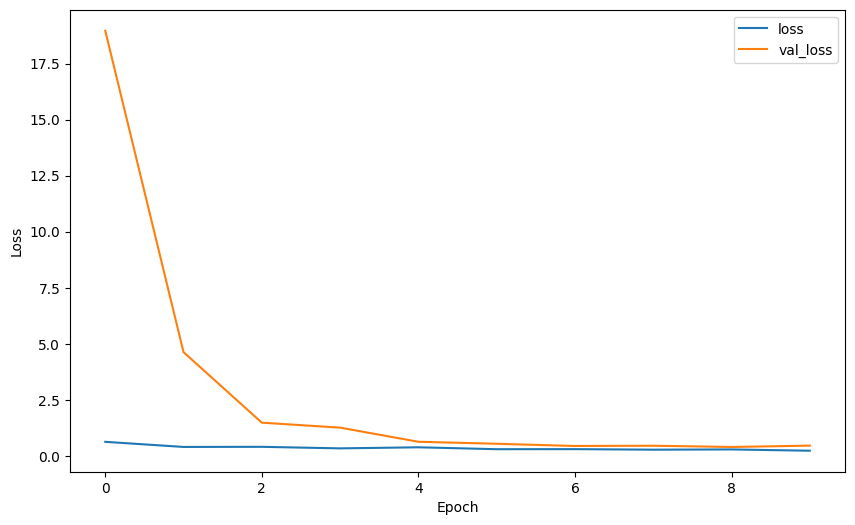

In [95]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

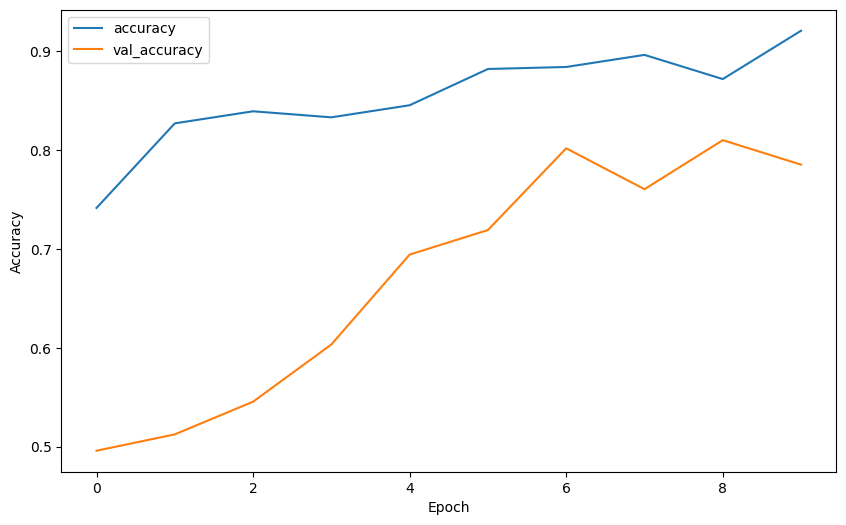

In [96]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [97]:
model.metrics_names

['loss', 'compile_metrics']

In [98]:
model.evaluate(test_image_gen)

4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.7609 - loss: 0.5254


[0.47940999269485474, 0.7851239442825317]

In [99]:
pred_probabilities = model.predict(test_image_gen)

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step


In [100]:
pred_probabilities

array([[0.99822503],
       [0.4901378 ],
       [0.99087524],
       [0.9393453 ],
       [0.9983329 ],
       [0.44695005],
       [0.1930667 ],
       [0.8804478 ],
       [0.5263249 ],
       [0.14737038],
       [0.8512222 ],
       [0.02855358],
       [0.90764517],
       [0.8606254 ],
       [0.9554604 ],
       [0.00605383],
       [0.4463546 ],
       [0.7907187 ],
       [0.04064036],
       [0.9906666 ],
       [0.9822679 ],
       [0.9998071 ],
       [0.17182733],
       [0.9178315 ],
       [0.0312839 ],
       [0.9514351 ],
       [0.96307904],
       [0.9902616 ],
       [0.9396242 ],
       [0.19680879],
       [0.99736905],
       [0.99998343],
       [0.9988292 ],
       [0.31490025],
       [0.18198018],
       [0.42588857],
       [0.9598747 ],
       [0.15327582],
       [0.9991991 ],
       [0.33337706],
       [0.5344553 ],
       [0.01391527],
       [0.98463595],
       [0.99855024],
       [0.7715695 ],
       [0.745257  ],
       [0.9895377 ],
       [0.332

In [104]:
predictions = pred_probabilities > 0.5

In [105]:
from sklearn.metrics import classification_report,confusion_matrix

In [106]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.55      0.39      0.46        61
           1       0.52      0.67      0.58        60

    accuracy                           0.53       121
   macro avg       0.53      0.53      0.52       121
weighted avg       0.53      0.53      0.52       121



In [107]:
confusion_matrix(test_image_gen.classes,predictions)

array([[24, 37],
       [20, 40]])

# Model Save

In [111]:
from tensorflow.keras.saving import save_model

save_model(model, 'eyes_model.keras')

# Predicting on an Image

In [116]:
train_image_gen.class_indices

{'cataract': 0, 'normal': 1}

In [114]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

# Modeli yükleyin
model = tf.keras.models.load_model('eyes_model.keras')

# Yeni görüntüyü açın ve uygun bir formata dönüştürün
image_path = "/kaggle/input/cataract-image-dataset/processed_images/test/cataract/image_259.png"
img = image.load_img(image_path, target_size=(500, 800))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Model eğitilirken normalizasyon yapıldıysa yapılmalıdır

# Tahmin yapın
prediction = model.predict(img_array)

# Tahmin edilen sınıfı ekrana yazdırın
predicted_class = np.argmax(prediction)
print('Tahmin edilen sınıf:', predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Tahmin edilen sınıf: 0


# Congratulations